# Stock data notebook 1
## This is intended to demonstrate a variety of data manipulations and analyses using pandas, matplotlib and seaborn.
### The data represents various daily values for 4 tech stocks downloaded from [Yahoo finance](https://finance.yahoo.com/) for the year 2023.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

### Read local data for 4 tech stocks

In [2]:
tech_stocks = ["AAPL", "GOOG", "MSFT", "AMZN"]
for ticker in tech_stocks:
    stock_df = pd.read_csv(f"./data/stock_data_2023/{ticker}.csv", parse_dates=["Date"])
    # Add a column to identify the stock (so we can concat thes DataFrames later)
    stock_df["Stock"] = ticker
    # Create a global variable for each stock
    globals()[ticker] = stock_df

### Check the basic information on one of the stocks

In [3]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       250 non-null    datetime64[ns]
 1   Open       250 non-null    float64       
 2   High       250 non-null    float64       
 3   Low        250 non-null    float64       
 4   Close      250 non-null    float64       
 5   Adj Close  250 non-null    float64       
 6   Volume     250 non-null    int64         
 7   Stock      250 non-null    object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 15.8+ KB


### Show a simple plot of the adjusted closing values using the `plot` function on a pandas `Dataframe`

<AxesSubplot: xlabel='Date'>

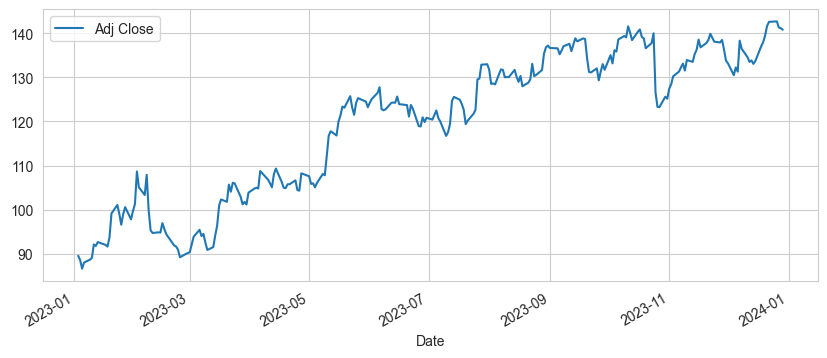

In [4]:
GOOG.plot(x="Date", y="Adj Close", figsize=(10, 4))

### Do the same thing using seaborn's figure-level plot `relplot`

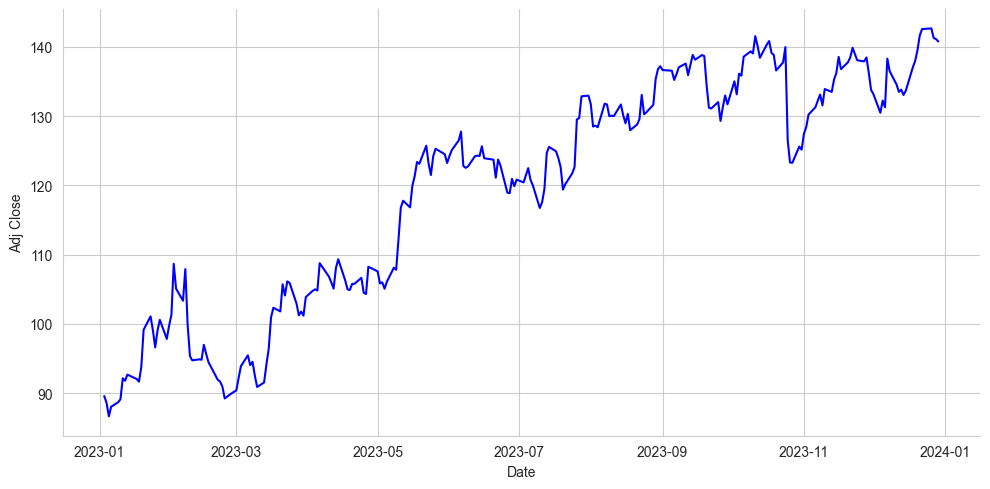

In [5]:
sns.relplot(data=GOOG, kind="line", x="Date", y="Adj Close", aspect=2, color="blue")

### Show the above plot but with x-ticks for the last day of each month

(19360.0, 19720.0)

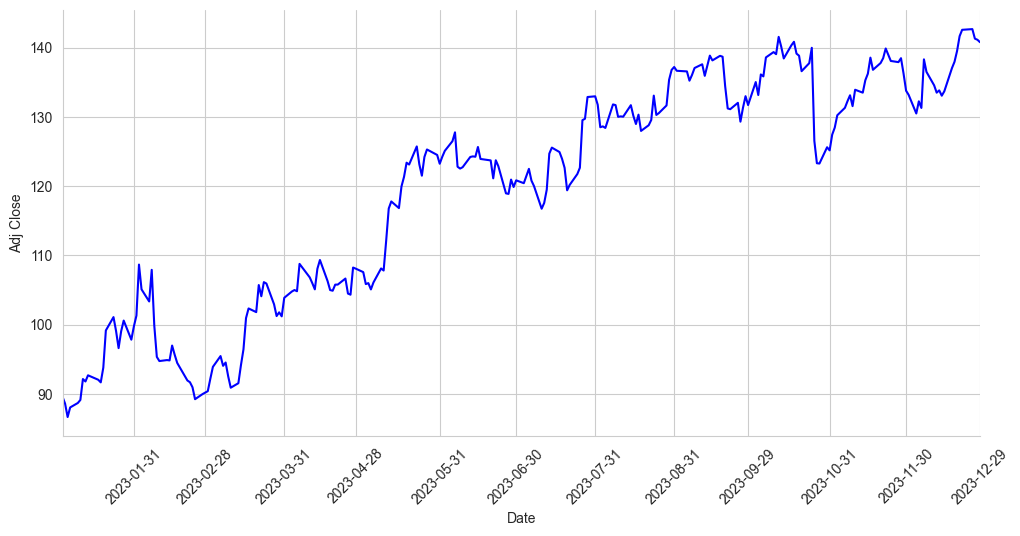

In [6]:
# Make sure the data is sorted by Date
GOOG.sort_values(by="Date", inplace=True)
# Make a new DataFrame filtering for the last day of each month using groupby and tail
end_of_month_dates = GOOG.groupby(GOOG["Date"].dt.month).tail(1)
# Plot & return the FacetGrid
fg = sns.relplot(data=GOOG, kind="line", x="Date", y="Adj Close", aspect=2, color="blue")
# Get the matplotlib.axes.Axes from the FacetGrid
ax = fg.ax
# Change the x ticks to be the last day of each month
ax.set_xticks(end_of_month_dates["Date"])
# Rotate the x labels by 45
ax.tick_params(axis='x', rotation=45)
# Remove the excess whitespace on the sides of the plot using the first and last record Dates
ax.set_xlim(left=GOOG.iloc[0]["Date"], right=GOOG.iloc[-1]["Date"])

### Concat the stocks together so we can easily plot some of the combined data

In [7]:
all_stocks = pd.concat([GOOG, MSFT, AMZN, AAPL])
all_stocks

,Date,Open,High,Low,Close,Adj Close,Volume,Stock
0,2023-01-03,89.830002,91.550003,89.019997,89.699997,89.598038,20738500,GOOG
1,2023-01-04,91.010002,91.239998,87.800003,88.709999,88.609169,27046500,GOOG
2,2023-01-05,88.070000,88.209999,86.559998,86.769997,86.671371,23136100,GOOG
3,2023-01-06,87.360001,88.470001,85.570000,88.160004,88.059799,26612600,GOOG
4,2023-01-09,89.195000,90.830002,88.580002,88.800003,88.699066,22996700,GOOG
...,...,...,...,...,...,...,...,...
245,2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800,AAPL
246,2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542831,28919300,AAPL
247,2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700,AAPL
248,2023-12-28,194.139999,194.660004,193.169998,193.580002,193.071426,34049900,AAPL


### Recreate the last seaborn plot but with data for all 4 stocks

(19360.0, 19720.0)

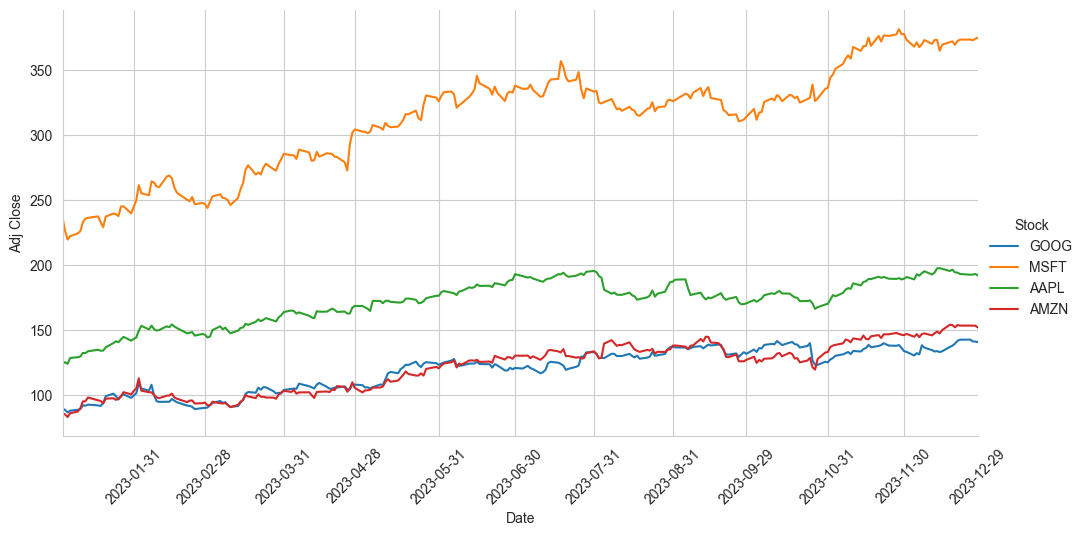

In [12]:
all_stocks.sort_values(by="Date", inplace=True)
end_of_month_dates = all_stocks.groupby(all_stocks["Date"].dt.month).tail(1)
fg = sns.relplot(data=all_stocks, kind="line", x="Date", y="Adj Close", hue="Stock", aspect=2, palette="tab10")
ax = fg.ax
ax.set_xticks(end_of_month_dates["Date"])
ax.tick_params(axis='x', rotation=45)
ax.set_xlim(left=all_stocks.iloc[0]["Date"], right=all_stocks.iloc[-1]["Date"])

### Recreate the DataFrames but add a new column with a _rolling mean_ based on the "Adj Close" values

In [9]:
tech_stocks = ["AAPL", "GOOG", "MSFT", "AMZN"]
# Store them in a dictionary
stocks_with_rm = {}
for ticker in tech_stocks:
    # Filter the all_stocks DataFrame for each individual stock
    stock = all_stocks.loc[all_stocks["Stock"] == ticker].copy()
    # Add the rolling mean. Note: setting min_periods is solely to see more data points at the low end
    stock["50d Rolling Mean"] = stock["Adj Close"].rolling(50, min_periods=25).mean()
    stocks_with_rm[ticker] = stock
# Do a quick check of one stock
stocks_with_rm["AAPL"]

,Date,Open,High,Low,Close,Adj Close,Volume,Stock,50d Rolling Mean
0,2023-01-03,130.279999,130.899994,124.169998,125.070000,124.048050,112117500,AAPL,NaN
1,2023-01-04,126.889999,128.660004,125.080002,126.360001,125.327507,89113600,AAPL,NaN
2,2023-01-05,127.129997,127.769997,124.760002,125.019997,123.998459,80962700,AAPL,NaN
3,2023-01-06,126.010002,130.289993,124.889999,129.619995,128.560867,87754700,AAPL,NaN
4,2023-01-09,130.470001,133.410004,129.889999,130.149994,129.086548,70790800,AAPL,NaN
...,...,...,...,...,...,...,...,...,...
245,2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800,AAPL,184.819675
246,2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542831,28919300,AAPL,185.107623
247,2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700,AAPL,185.400155
248,2023-12-28,194.139999,194.660004,193.169998,193.580002,193.071426,34049900,AAPL,185.732541


### Show a couple stocks in the same plot, including both the adjusted close values and the new rolling mean

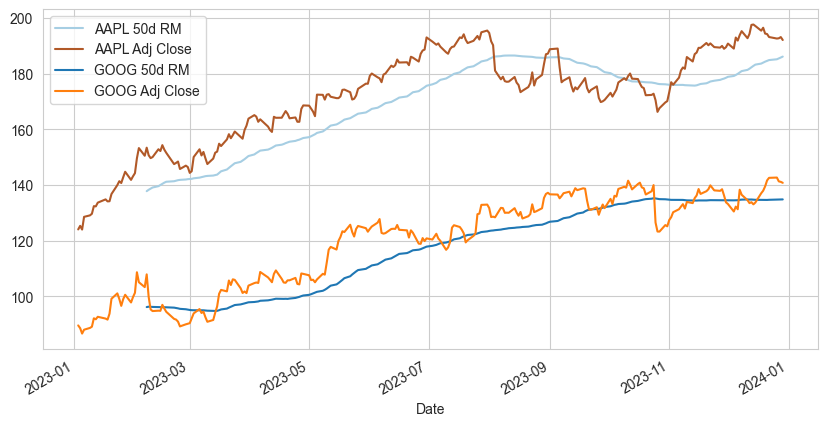

In [10]:
# Get the matplotlib.axes.Axes from the pandas plot function
ax = stocks_with_rm["AAPL"].plot(kind="line", x="Date", y=["50d Rolling Mean", "Adj Close"], figsize=(10, 5), colormap="Paired")
# Add the 2nd set of data to the same axes
stocks_with_rm["GOOG"].plot(ax=ax, kind="line", x="Date", y=["50d Rolling Mean", "Adj Close"])
# Add a legend manually
plt.legend(["AAPL 50d RM", "AAPL Adj Close", "GOOG 50d RM", "GOOG Adj Close"])

### Now view the adjusted close and rolling mean for **each** stock in subplots

<AxesSubplot: title={'center': 'AMZN'}>

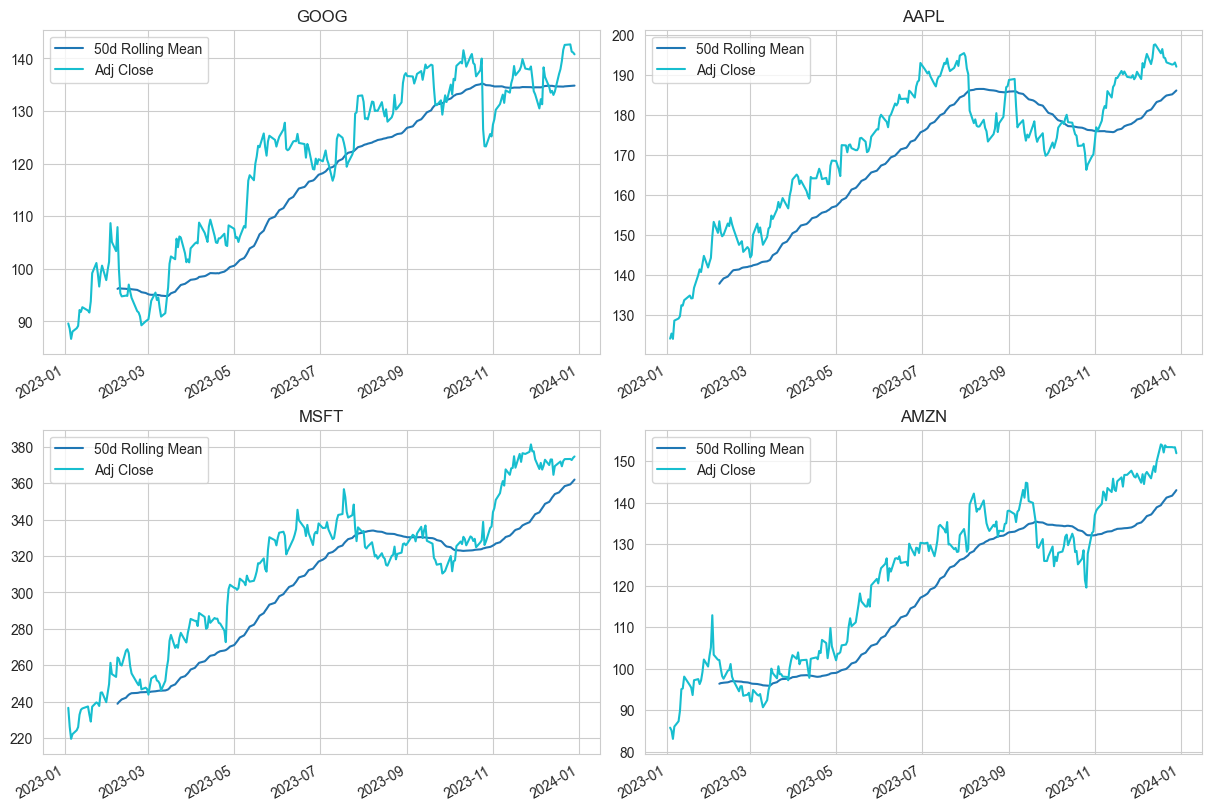

In [11]:
# Create subplots directly with matplotlib.pyplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), layout="constrained")
# Add each plot
stocks_with_rm["GOOG"].plot(ax=axes[0,0], kind="line", x="Date", y=["50d Rolling Mean", "Adj Close"], title="GOOG", xlabel="", colormap="tab10")
stocks_with_rm["AAPL"].plot(ax=axes[0,1], kind="line", x="Date", y=["50d Rolling Mean", "Adj Close"], title="AAPL", xlabel="", colormap="tab10")
stocks_with_rm["MSFT"].plot(ax=axes[1,0], kind="line", x="Date", y=["50d Rolling Mean", "Adj Close"], title="MSFT", xlabel="", colormap="tab10")
stocks_with_rm["AMZN"].plot(ax=axes[1,1], kind="line", x="Date", y=["50d Rolling Mean", "Adj Close"], title="AMZN", xlabel="", colormap="tab10")